### Understanding RAG and Choosing the Right Vector Database

Imagine you have a huge library of books. Instead of searching by specific keywords, vector search allows you to find books based on their overall theme or meaning.

**How does it work?**

- **Vector Representation**: Each book is represented as a numerical code (a vector) that captures its essence.
- **Semantic Similarity**: When you search for a book, your query is also converted into a vector.
- **Finding the Best Match**: The system compares your query vector to the vectors of all the books. The closer the vectors, the more similar the book is to your query.
- **Relevant Results**: The system returns the books with the closest vector matches, providing you with the most relevant results.
  
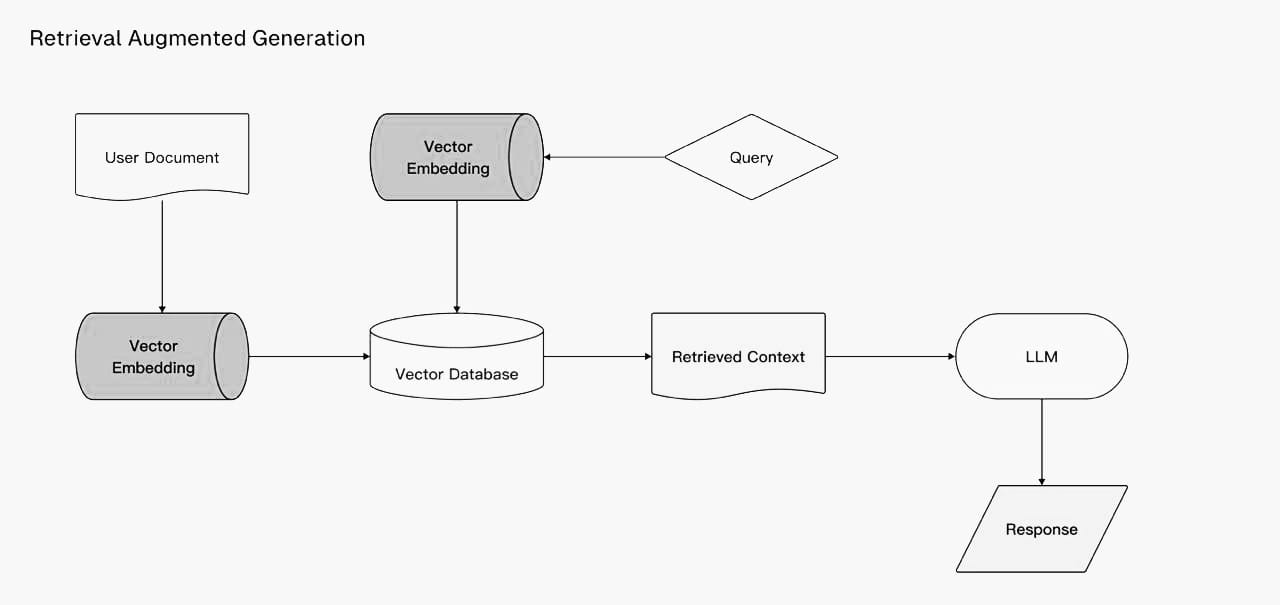


**Why is it useful?**

- **Contextual Understanding**: Vector search goes beyond keyword matching, understanding the context and meaning of your query.
- **Accurate Retrieval**: It helps you find information that is semantically similar to your search, even if it doesn't contain the exact keywords.
- **Improved Recommendations**: It can be used to recommend products, articles, or other content based on your preferences and past behavior.
- **Efficient Question Answering**: In AI-powered question-answering systems, vector search helps find the most relevant passages to answer your question.

In essence, vector search is a powerful technique that enables machines to understand and process information in a way that is more human-like, leading to more accurate and relevant results.

#### 1. Exact Nearest Neighbor (ENN) Search

Exact Nearest Neighbor (ENN) search is a method for finding the closest match to a query vector in high-dimensional space with full precision. ENN compares each data point’s vector to the query vector and returns the most accurate match. It’s best suited for use cases where precision is critical, and a "close enough" result is unacceptable. ENN works well in smaller datasets since it requires checking each vector, which can be computationally intensive.

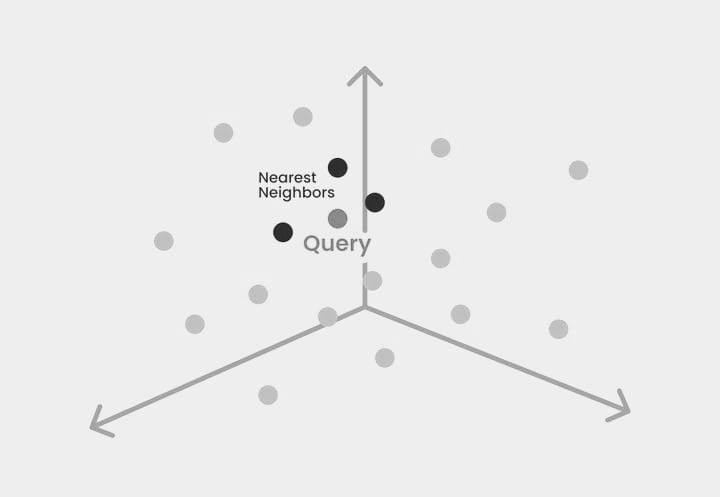

##### How Exact Nearest Neighbor (ENN) Search Works

- **Vector Representation**: All data points and the query are represented as vectors in a high-dimensional space. This allows each data point to be mapped based on its unique features.
- **Distance Calculation**: For each data point, the algorithm calculates the distance to the query vector using a distance metric such as Euclidean distance or Manhattan distance. This step ensures that each comparison measures the exact similarity.
- **Find the Closest Points**: After calculating the distances, the algorithm identifies the data points with the smallest distance to the query. This process ensures the highest precision by focusing only on the exact nearest neighbor.
- **Return Result**: The algorithm then returns the closest match, typically as a list of the top K nearest neighbors. Because it’s an exact search, this list includes only the most precise matches, ensuring high accuracy.

**Best Fit Databases:**

- **Pinecone**: Optimized for accurate nearest neighbor searches with real-time, high-dimensional vector processing.
- **Milvus**: Designed for precise vector searches, with support for scalable data storage and efficient indexing.

**Example Use Cases:**

- **Medical Image Analysis**: When comparing new medical images (like MRIs) against a database of existing ones, ENN can retrieve the most accurate match to help identify patterns, anomalies, or specific diagnoses. Since precision is key, ENN ensures that only the closest match is returned.
- **Fraud Detection in Banking**: ENN can be used to compare transaction patterns against a known set of fraudulent patterns, providing exact matches to prevent unauthorized or suspicious activity. Here, accuracy is critical since false positives or "close enough" results can lead to missed fraud detection.

**Problem Statements Best Suited for ENN:**

- **Diagnostic Pattern Matching**: Determining exact matches of medical data with known conditions. 
- **Security and Surveillance**: Comparing face scans or behavioral patterns for security clearance, requiring precise matching. 
- **Product Defect Detection**: Identifying specific product flaws in manufacturing where exact similarity to defects is necessary.


In [3]:
from pinecone import Pinecone
import openai
import os
from dotenv import load_dotenv
import PyPDF2  
load_dotenv()
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

AZURE_OPENAI_API_KEY = os.getenv("AZURE_OPENAI_API_KEY")
AZURE_OPENAI_API_BASE = os.getenv("AZURE_OPENAI_API_BASE")
AZURE_OPENAI_API_VERSION = os.getenv("AZURE_OPENAI_API_VERSION")
AZURE_OPENAI_CHAT_DEPLOYMENT_NAME = os.getenv("AZURE_OPENAI_DEPLOYMENT_NAME")
AZURE_OPENAI_EMBEDDING_DEPLOYMENT_NAME = os.getenv("AZURE_OPENAI_EMBEDDING_DEPLOYMENT_NAME")
PINECONE_API_KEY = os.getenv("PINECONE_API_KEY")

# Initialize Pinecone client
def initialize_pinecone_client():
    return Pinecone(api_key=PINECONE_API_KEY)

# Set up the Pinecone Assistant
def initialize_assistant(pinecone_client, assistant_name="example-assistant"):
    return pinecone_client.assistant.Assistant(assistant_name=assistant_name)

# Function to upload a file to Pinecone Assistant
def upload_file_to_assistant(assistant, file_path, timeout=None):
    response = assistant.upload_file(file_path=file_path, timeout=timeout)
    return response

# Function to read text from a PDF file
def read_pdf(file_path):
    text = ""
    with open(file_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Function to generate embeddings using Azure OpenAI Embedding model
def generate_embeddings(text):
    openai.api_key = AZURE_OPENAI_API_KEY
    openai.api_base = AZURE_OPENAI_API_BASE
    openai.api_type = 'azure'
    openai.api_version = AZURE_OPENAI_API_VERSION

    # Embedding request (modify this if the structure changes)
    response = openai.Embedding.create(
        engine=AZURE_OPENAI_EMBEDDING_DEPLOYMENT_NAME,
        input=text
    )
    # Extract the embeddings
    embedding = response['data'][0]['embedding']
    return embedding

# Function to generate chat response using Azure OpenAI's GPT-4o model
def get_chat_response_with_gpt4o(prompt):
    openai.api_key = AZURE_OPENAI_API_KEY
    openai.api_base = AZURE_OPENAI_API_BASE
    openai.api_type = 'azure'
    openai.api_version = AZURE_OPENAI_API_VERSION

    response = openai.ChatCompletion.create(
        engine=AZURE_OPENAI_CHAT_DEPLOYMENT_NAME,
        messages=[{"role": "user", "content": prompt}]
    )
    return response['choices'][0]['message']['content']

if __name__ == "__main__":
    # Initialize Pinecone client and Assistant
    pinecone_client = initialize_pinecone_client()
    assistant = initialize_assistant(pinecone_client)

    # Upload a file to Assistant
    file_path = "/Users/Learning/Vector Databases/Pdfs Folder/MBA-in-Business-Analytics.pdf"
    file_response = upload_file_to_assistant(assistant, file_path=file_path)
    #print("File upload response:", file_response)

    pdf_text = read_pdf(file_path)
    embedding_pdf = generate_embeddings(pdf_text)


user_query = "Who should apply for MBA."
chat_response = get_chat_response_with_gpt4o(user_query)
print("Chat Response:", chat_response)

Chat Response: Deciding to pursue a Master of Business Administration (MBA) is a significant commitment and is suited to individuals who have certain goals, characteristics, and professional aspirations. Here are some people who might consider applying for an MBA:

1. **Career Advancement Seekers**: Professionals who want to move up the corporate ladder, transition into leadership or executive roles, or switch industries might pursue an MBA to gain the necessary skills and credentials.

2. **Aspiring Entrepreneurs**: Individuals who plan to start their own business can benefit from an MBA, which provides knowledge in business planning, management, finance, marketing, and other critical areas of entrepreneurship.

3. **Career Switchers**: People looking to change career paths, especially into industries such as consulting, finance, or technology, may find that an MBA facilitates the transition by providing relevant skills and opening up networking opportunities.

4. **Recent Graduates**

#### 2. Approximate Nearest Neighbor (ANN) Search

Approximate Nearest Neighbor (ANN) search finds vectors that are close enough to the query vector, but not necessarily the exact match. ANN is highly efficient with large datasets, where precision can be traded off for speed, making it suitable for applications where rapid results are more important than 100% accuracy. ANN divides the dataset into manageable subsets, searching within the closest subset to find a “good enough” match.

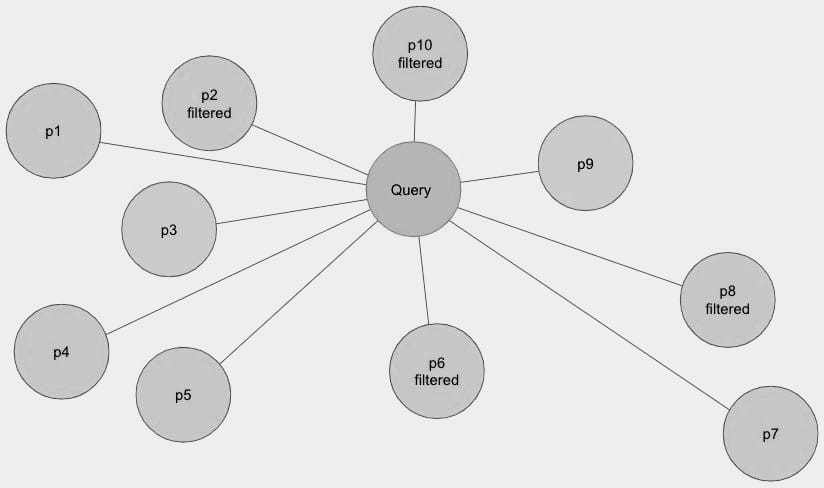

**How Approximate Nearest Neighbor (ANN) Search Works**

- **Vector Representation**: Just like ENN, data points and the query are represented as vectors in high-dimensional space, enabling similarity-based comparison.
- **Data Partitioning**: To speed up the process, ANN divides the dataset into smaller, manageable partitions using techniques like **hashing**, **tree-based structures**, or **clustering**. This reduces the computational load by limiting searches to relevant subsets.
- **Search within Subset**: Instead of checking every data point, the algorithm narrows the search to the nearest partition(s), saving time by avoiding irrelevant data points.
- **Return Approximate Neighbor**: ANN returns data points that are "close enough" to the query vector, balancing speed with accuracy. While it may not return the exact closest neighbors, it achieves high performance in large datasets where rapid results are more important than absolute precision.

**Best Fit Databases:**

- **Weaviate**: Provides robust ANN capabilities and allows for quick, scalable semantic similarity searches.
- **FAISS (Facebook AI Similarity Search)**: Optimized for high-speed ANN search, especially in large-scale applications.

**Example Use Cases:**

- **E-commerce Product Recommendations**: When recommending products to users based on their recent searches or purchases, ANN provides rapid suggestions by identifying similar but not exact items. This keeps recommendations relevant without the delay exact matching might introduce.
- **Social Media Content Recommendation**: ANN can be used to suggest relevant content, such as posts or videos, based on a user's recent engagement. The speed of ANN enables real-time, dynamic content recommendations based on approximate similarity.

**Problem Statements Best Suited for ANN:**

- **Movie or Song Recommendations**: Suggesting similar content based on partial matches to user preferences.
- **Image or Video Search**: Finding related images or videos in a large dataset where exact match is not necessary.
- **Customer Segmentation**: Grouping customers based on approximate buying patterns or behavior for targeted marketing.


In [4]:
import weaviate
from weaviate.classes.init import Auth
def initialize_weaviate_client():
    wcd_url = os.environ["WCD_URL"]
    wcd_api_key = os.environ["WCD_API_KEY"]

    client = weaviate.connect_to_weaviate_cloud(
        cluster_url=wcd_url,                                    
        auth_credentials=Auth.api_key(wcd_api_key),             
    )

    print(client.is_ready()) 
    return client

if __name__ == "__main__":
    # Initialize Weaviate client
    weaviate_client = initialize_weaviate_client()

    file_path = "/Users/Learning/Vector Databases/Pdfs Folder/MBA-in-Business-Analytics.pdf"
    pdf_text = read_pdf(file_path)

    embedding_pdf = generate_embeddings(pdf_text)

    user_query = "Who should apply for MBA."
    chat_response = get_chat_response_with_gpt4o(user_query)
    print("Chat Response:", chat_response)

    # Clean up resources if necessary (depends on client implementation)
    weaviate_client.close()

True
Chat Response: Deciding whether to pursue an MBA (Master of Business Administration) depends on individual career goals, current professional status, and personal interests. Here are some scenarios and types of professionals who may consider applying for an MBA:

1. **Career Advancement**: Professionals looking to advance to higher management or executive roles within their current industry. An MBA can equip them with the necessary leadership, strategic thinking, and managerial skills.

2. **Career Changers**: Individuals seeking to switch industries or job functions. An MBA provides a broad understanding of business concepts and skills that are transferable across various industries.

3. **Entrepreneurs and Aspiring Entrepreneurs**: People interested in starting their own business, or those who already own a business but want to gain formal business training and networking opportunities to scale their venture.

4. **Skill Enhancement**: Professionals aiming to acquire new skills 

#### 3. Semantic Search

Semantic search goes beyond keyword matching to understand the query’s intent and meaning. By transforming text into vector embeddings, it can search based on context, finding results that are semantically similar. This approach is valuable in applications where understanding user intent is crucial, such as question-answering systems, document retrieval, and recommendation engines that focus on meaningful interactions.
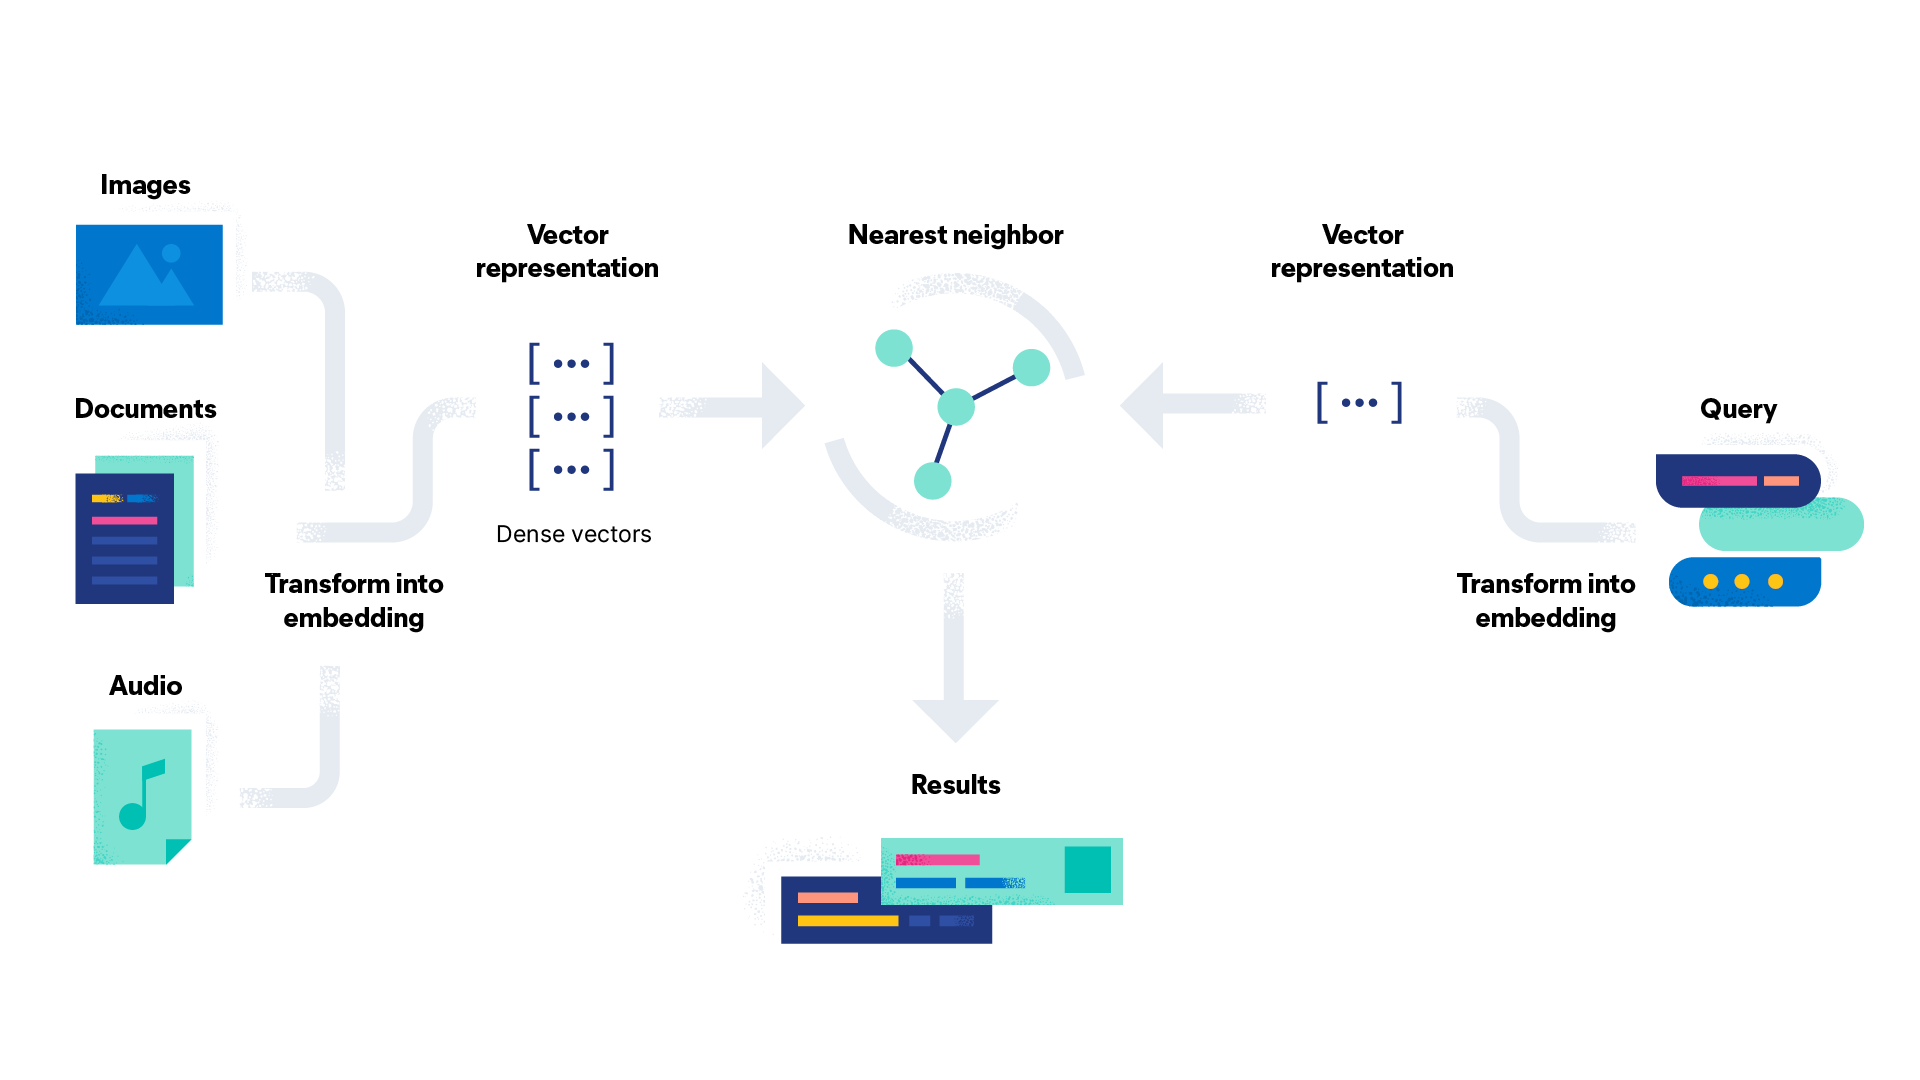

##### **How Semantic Search Works**

- **Text Embeddings**: Both the query and documents are converted into **dense vector embeddings** that capture the semantic meaning and context of the text. This is achieved by leveraging embeddings generated from natural language processing (NLP) models.
- **Similarity Comparison**: The algorithm then compares the embeddings of the query and the documents using similarity measures like **cosine similarity**. This comparison identifies content that is contextually related rather than simply keyword-based.
- **Contextual Understanding**: Semantic search goes beyond word matching by interpreting the underlying meaning of words in context, identifying documents that share similar intent or meaning to the query.
- **Return Relevant Results**: The search algorithm ranks the most semantically similar results and returns them, ensuring that the results are highly relevant to the query’s context. This is particularly effective in applications where intent-based matching is needed.

**Best Fit Databases:**

- **Azure Cognitive Search**: Equipped with semantic search and NLP capabilities for precise, context-based search.
- **Qdrant**: A vector search engine built specifically to support semantic similarity with accurate retrieval of text-based data.

**Example Use Cases:**

- **Legal Document Retrieval**: Law firms and research institutions use semantic search to retrieve legal documents that align with the meaning of specific legal terms, even if those terms are not mentioned verbatim. This helps attorneys find precedents and case laws quickly.
- **Knowledge Management**: Large organizations use semantic search to allow employees to retrieve documents and information based on the topic's meaning, improving productivity by surfacing the most relevant information quickly.

**Problem Statements Best Suited for Semantic Search:**

- **Research Article Retrieval**: Searching for papers in academic databases where similar topics or concepts are addressed.
- **Customer Support Queries**: Quickly finding relevant articles in knowledge bases based on the meaning of customer queries.
- **Content Recommendation**: Recommending content based on a deep understanding of user intent and historical data.


In [5]:
from langchain.vectorstores import AzureSearch
from langchain.text_splitter import TokenTextSplitter
from langchain.schema import Document

#Azure Search configuration
AZURE_SEARCH_SERVICE_NAME = os.getenv("AZURE_SEARCH_SERVICE_NAME")
AZURE_SEARCH_ADMIN_API_KEY = os.getenv("AZURE_SEARCH_ADMIN_API_KEY")
AZURE_SEARCH_INDEX_NAME = os.getenv("AZURE_SEARCH_INDEX_NAME")
AZURE_SEARCH_SERVICE_ENDPOINT = os.getenv("AZURE_SEARCH_SERVICE_ENDPOINT")

def initialize_azure_search():
    """Initialize the Azure Search service."""
    return AzureSearch(
        azure_search_endpoint=AZURE_SEARCH_SERVICE_ENDPOINT,
        azure_search_key=AZURE_SEARCH_ADMIN_API_KEY,
        index_name=AZURE_SEARCH_INDEX_NAME,
        embedding_function=generate_embeddings
    )

def search_azure_and_chat(query, search_type="similarity", top_k=5):
    """
    Search Azure Search for relevant documents based on a query, 
    and then use OpenAI API to generate a chat response with the search context.
    
    Parameters:
        query (str): The user query for the Azure Search.
        search_type (str): The type of search to use in Azure Search, typically "similarity".
        top_k (int): The number of top results to retrieve.
        
    Returns:
        str: The response from the chat model based on the search results.
    """
    # Query Azure Search with the specified search_type and number of results
    search_results = initialize_azure_search().search(query, search_type=search_type, k=top_k)
    
    # Extract relevant information from search results
    context = ""
    for result in search_results:
        context += f"{result.page_content}\n"  # Use 'page_content' for the document text

    # Construct the prompt with the search context
    prompt = f"Using the following information from Azure Search:\n\n{context}\n\nUser question: {query}"
    chat_response = get_chat_response_with_gpt4o(prompt)

    return chat_response

if __name__ == "__main__":
    # Initialize Azure search 
    azure_seacrh = initialize_azure_search()

    file_path = "/Users/Learning/Vector Databases/Pdfs Folder/MBA-in-Business-Analytics.pdf"
    pdf_text = read_pdf(file_path)

    # Create an initial Document with the full text
    initial_document = Document(page_content=pdf_text, metadata={"source": file_path})

    # Split the initial document into chunks
    text_splitter = TokenTextSplitter(chunk_size=1000, chunk_overlap=50)
    docs = text_splitter.split_documents([initial_document])

    # Add documents to Azure Search
    azure_seacrh.add_documents(documents=docs)

    user_query = "Who should apply for MBA."
    chat_response = get_chat_response_with_gpt4o(user_query)
    print("Chat Response:", chat_response)

/opt/anaconda3/envs/openai_env/lib/python3.13/site-packages/pydantic/v1/typing.py:68: DeprecationWarning: Failing to pass a value to the 'type_params' parameter of 'typing.ForwardRef._evaluate' is deprecated, as it leads to incorrect behaviour when calling typing.ForwardRef._evaluate on a stringified annotation that references a PEP 695 type parameter. It will be disallowed in Python 3.15.
  return cast(Any, type_)._evaluate(globalns, localns, recursive_guard=set())
/opt/anaconda3/envs/openai_env/lib/python3.13/site-packages/pydantic/v1/typing.py:68: DeprecationWarning: Failing to pass a value to the 'type_params' parameter of 'typing.ForwardRef._evaluate' is deprecated, as it leads to incorrect behaviour when calling typing.ForwardRef._evaluate on a stringified annotation that references a PEP 695 type parameter. It will be disallowed in Python 3.15.
  return cast(Any, type_)._evaluate(globalns, localns, recursive_guard=set())


Chat Response: An MBA (Master of Business Administration) is a versatile and prestigious degree that can benefit a wide range of individuals. People who should consider applying for an MBA typically fall into the following categories:

1. **Career Advancers:** Professionals who are looking to climb the corporate ladder and assume leadership or executive positions might find an MBA advantageous for gaining the skills and credentials necessary for advancement.

2. **Career Changers:** Individuals who wish to switch fields or industries. An MBA can provide the foundational business knowledge and network to transition smoothly into a new sector.

3. **Entrepreneurs and Aspiring Entrepreneurs:** Those who plan to start their own business or want to gain the skills to better manage and grow their existing business can benefit from the broad range of knowledge an MBA provides.

4. **Recent Graduates:** Individuals who have completed their undergraduate studies and wish to deepen their busines

#### 4. Sparse Vector Search

Sparse vector search is ideal when vectors contain a high number of zero values, commonly used in datasets where only specific features are relevant. Sparse search is efficient for finding matches in cases where data is less dense, such as text represented by term frequency or sparse word embeddings. This approach works well for scenarios like document indexing, where only a subset of features is required.

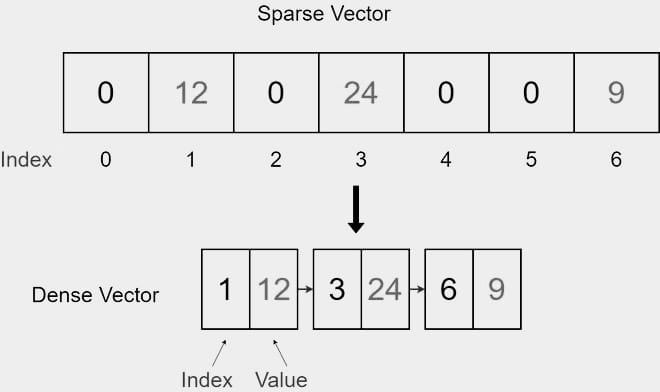

##### **How Sparse Vector Search Works**

- **Sparse Representation**: Data points and queries are represented as **sparse vectors**, where most elements are zero, making them lighter and faster to process. This is especially useful for datasets where only a subset of features is significant.
- **Distance Metrics**: The algorithm uses specialized metrics such as **cosine similarity** or **Jaccard index**, which focus only on the non-zero elements of the sparse vectors. This way, it calculates similarity based on meaningful, present values without the noise of irrelevant attributes.
- **Indexing**: Sparse vectors are indexed using efficient data structures, like **inverted indices** or **locality-sensitive hashing** (LSH), which help speed up the retrieval process by quickly filtering out irrelevant data.
- **Nearest Neighbor Search**: Based on the indexed sparse vectors, the algorithm efficiently identifies the nearest neighbors by focusing on the non-zero, significant values, which filters out extraneous data that doesn’t contribute to the search.
- **Return Relevant Results**: The algorithm ranks and returns results based on their similarity to the query vector, ensuring that the most relevant data points, even in sparse datasets, are prioritized.

**Best Fit Databases:**

- **Elasticsearch**: Supports sparse vectors natively, enabling high-speed sparse searches with large datasets.
- **Redis**: Through its ML module, Redis can handle sparse vector similarity efficiently.

**Example Use Cases:**

- **Text-Based News Retrieval**: Sparse vector search allows for the retrieval of relevant news articles based on key terms or infrequent topics. This is useful for niche topics where only certain keywords matter, like climate change or rare diseases.
- **Job Posting Search**: Sparse search can help match job seekers to relevant job postings based on key skills, ignoring less important attributes, and focusing on the sparse but crucial ones, like certifications or specific industry experience.

**Problem Statements Best Suited for Sparse Search:**
- **Document Indexing**: Retrieving documents based on specific keywords, such as research papers on niche topics.
- **Spam Detection**: Finding emails with infrequent but important spam indicators, like keywords or phrases specific to spam content.
- **Selective Data Retrieval**: Filtering out data in large databases where only a subset of features are of interest.

In [7]:
from elasticsearch import Elasticsearch, helpers

# Elasticsearch configuration
ES_ENDPOINT=os.getenv("ES_ENDPOINT")
ES_API_KEY =os.getenv("ES_API_KEY")

# Initialize Elasticsearch client
es_client = Elasticsearch(
    ES_ENDPOINT,
    api_key=ES_API_KEY
)

def index_documents_to_elasticsearch(docs, index_name="documents"):
    """Index documents into Elasticsearch."""
    # Prepare documents for bulk indexing
    actions = [
        {
            "_index": index_name,
            "_source": {"content": doc.page_content, "metadata": doc.metadata}
        }
        for doc in docs
    ]
    
    # Use bulk helper to add documents
    helpers.bulk(es_client, actions)

def search_elasticsearch(query, index_name="documents", top_k=5):
    """Search Elasticsearch for relevant documents based on a query."""
    # Perform a basic match query
    response = es_client.search(
        index=index_name,
        body={
            "query": {
                "match": {"content": query}
            },
            "size": top_k
        }
    )
    
    # Collect the content of each result
    results = [hit["_source"]["content"] for hit in response["hits"]["hits"]]
    return "\n".join(results)

def search_elasticsearch_and_chat(query, top_k=5):
    """Search Elasticsearch and generate a chat response based on the search context."""
    # Retrieve context from Elasticsearch
    context = search_elasticsearch(query, top_k=top_k)
    
    # Construct the prompt with search context
    prompt = f"Using the following information from Elasticsearch:\n\n{context}\n\nUser question: {query}"
    chat_response = get_chat_response_with_gpt4o(prompt)
    
    return chat_response

if __name__ == "__main__":
    # Load a PDF, read it, and create a document
    file_path = "Pdfs Folder/MBA-in-Business-Analytics.pdf"
    pdf_text = read_pdf(file_path)
    initial_document = Document(page_content=pdf_text, metadata={"source": file_path})
    
    text_splitter = TokenTextSplitter(chunk_size=1000, chunk_overlap=50)
    docs = text_splitter.split_documents([initial_document])
    
    # Index documents into Elasticsearch
    index_documents_to_elasticsearch(docs, index_name="documents")
    
    # Sample query and response
    user_query = "Give me a summary of Programme Curriculum."
    chat_response = search_elasticsearch_and_chat(user_query)
    print("Chat Response:", chat_response)

Chat Response: The programme curriculum for the MBA in Business Analytics offered by BITS Pilani's Work Integrated Learning Program (WILP) is carefully designed to ensure the integration of theoretical knowledge with practical, real-world experiences relevant to current business and industry needs. Here are the key highlights of the curriculum:

1. **Modern Management Techniques**: Students learn to apply contemporary management practices to benefit their firms and society, emphasizing ethical and socially responsible approaches.

2. **Cutting-edge Technologies and Methods**: The curriculum includes advanced frameworks, technologies, and analytical methods for solving business problems, with a focus on artificial intelligence, machine learning, and digitization techniques.

3. **Deep Analytical Skills**: Students develop strong analytical skills, business knowledge, and critical problem-solving abilities to transform data into sound business decisions that provide a competitive edge.

